<a href="https://colab.research.google.com/github/KevinWashington/SILLM_Atividade_1/blob/main/Atividade_1_Zscore_Binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação do Ambiente

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import kagglehub
from scipy.stats import norm, binom

#Parte 1: Z-score e Binomial Distribution

## Seção A - Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala. Faça dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados.

### Contextualização do dataset

O conjunto de dados da flor de Íris é um conjunto de dados multivariados introduzido pelo estatístico e biólogo britânico Ronald Fisher em seu artigo de 1936, O uso de múltiplas medições em problemas taxonômicos. Às vezes, é chamado de conjunto de dados Iris de Anderson porque Edgar Anderson coletou os dados para quantificar a variação morfológica das flores de Íris de três espécies relacionadas.

O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Íris (Iris Setosa, Iris virginica e Iris versicolor). Quatro características foram medidas em cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros.

In [ ]:
df = kagglehub.dataset_load(
  kagglehub.KaggleDatasetAdapter.PANDAS,
  "arshid/iris-flower-dataset",
  'IRIS.csv',
)

df.head()

| Nome da Coluna  | Descrição                                                                      |
|-----------------|--------------------------------------------------------------------------------|
| `sepal_length`  | Comprimento da sépala da flor, em centímetros.                                  |
| `sepal_width`   | Largura da sépala da flor, em centímetros.                                     |
| `petal_length`  | Comprimento da pétala da flor, em centímetros.                                  |
| `petal_width`   | Largura da pétala da flor, em centímetros.                                     |
| `species`       | Espécie da flor de Íris (Iris Setosa, Iris Virginica ou Iris Versicolor).     |

### Histogramas

Na elaboração dos histogramas, foram selecionadas as features 'petal_length' e 'sepal_width'. Para cada uma, utilizei dois conjuntos de bins com tamanhos de 15 e 5, respectivamente.

In [ ]:
FEATURE_1 = 'petal_length'
FEATURE_2 = 'sepal_width'
CLASS_COLUMN = 'species'
classes = df[CLASS_COLUMN].unique()

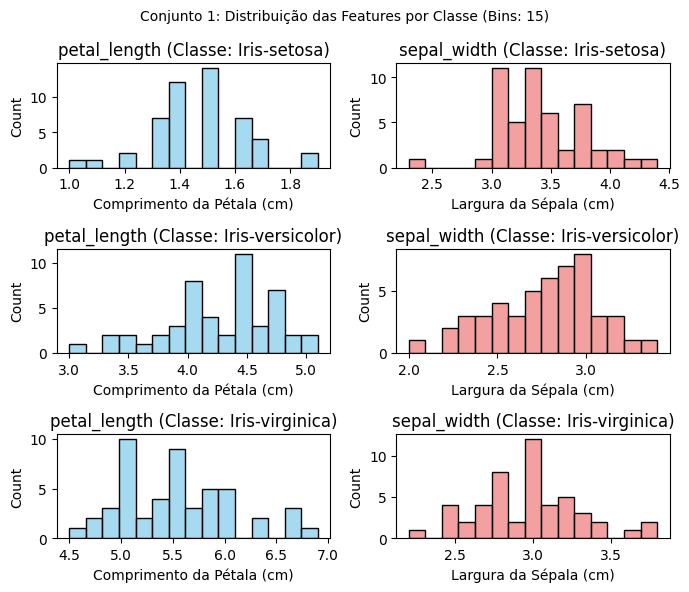

In [42]:
BINS_1 = 15

fig, axes = plt.subplots(nrows=len(classes), ncols=2, figsize=(7, 6))
fig.suptitle(f'Conjunto 1: Distribuição das Features por Classe (Bins: {BINS_1})', fontsize=10)

for i, class_name in enumerate(classes):
    df_class = df[df[CLASS_COLUMN] == class_name]

    # Feature 1: petal_length
    sns.histplot(df_class[FEATURE_1], bins=BINS_1, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'{FEATURE_1} (Classe: {class_name})')
    axes[i, 0].set_xlabel('Comprimento da Pétala (cm)')

    # Feature 2: sepal_width
    sns.histplot(df_class[FEATURE_2], bins=BINS_1, ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f'{FEATURE_2} (Classe: {class_name})')
    axes[i, 1].set_xlabel('Largura da Sépala (cm)')

plt.tight_layout()
plt.show()

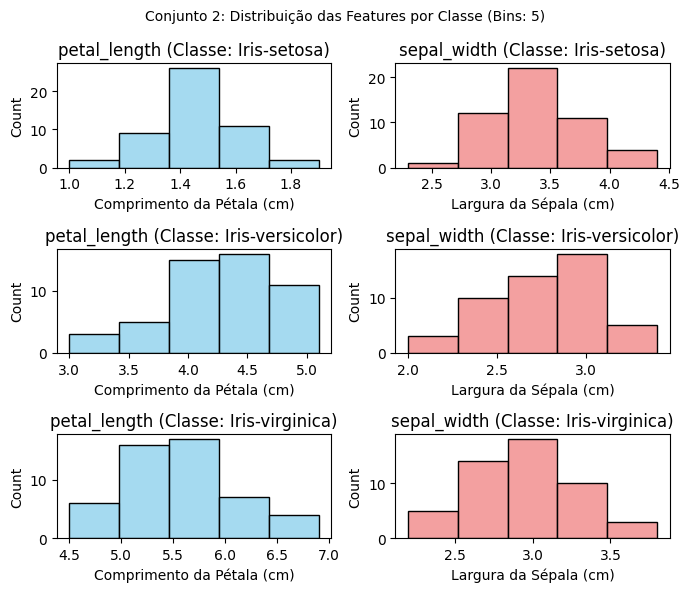

In [43]:
BINS_2 = 5

fig, axes = plt.subplots(nrows=len(classes), ncols=2, figsize=(7, 6))
fig.suptitle(f'Conjunto 2: Distribuição das Features por Classe (Bins: {BINS_2})', fontsize=10)

for i, class_name in enumerate(classes):
    df_class = df[df[CLASS_COLUMN] == class_name]

    # Feature 1: petal_length
    sns.histplot(df_class[FEATURE_1], bins=BINS_2, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'{FEATURE_1} (Classe: {class_name})')
    axes[i, 0].set_xlabel('Comprimento da Pétala (cm)')

    # Feature 2: sepal_width
    sns.histplot(df_class[FEATURE_2], bins=BINS_2, ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f'{FEATURE_2} (Classe: {class_name})')
    axes[i, 1].set_xlabel('Largura da Sépala (cm)')

plt.tight_layout()
plt.show()

### Discussão

Sobre a feature pental_length, a distribuição da Iris-setosa é quase perfeitamente separada das demais, sem sobreposição significativa. A sobreposição é maior entre Iris-versicolor e Iris-virginica. Logo a Iris-setosa seria classificada com quase 100% de precisão. A dificuldade estaria apenas em distinguir entre versicolor e virginica na zona de sobreposição.

As distribuições de todas as três classes se sobrepõem substancialmente. As médias das classes estão próximas e as caudas se misturam amplamente. Utilizar apenas esta feature tornaria a tarefa de classificação muito difícil.

Mesmo com BINS=5, a separabilidade das classes é evidente. A distribuição de petal_length da Iris-setosa se mantém isolada das demais classes, e a sobreposição entre versicolor e virginica continua sendo o principal desafio. Portanto, a conclusão de que petal_length é o melhor preditor não é alterada pela mudança nos bins.

##Seção B - Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho. Produza dados artificiais, plote o histograma e a distribuição que aproxime os dados. Em seguida, defina estudos como o exemplo da pizza explicado em sala, sempre partido da versão não padronizada e depois os cálculos na versão padronizada. Sempre considerando o contexto do seu primeiro trabalho.

### Contexto

A variável de interesse selecionada para este experimento é o `petal_length` (comprimento da pétala) especificamente da espécie `Iris-versicolor`. Foi escolhido este, pois o comprimento da pétala é uma das características mais distintivas entre as espécies de Íris, e focar na `Iris-versicolor` nos permitirá analisar a distribuição desta medida dentro de uma classe específica.

### Dados artificiais

Para realizar o cálculo do Z-score e simular a distribuição da variável de interesse, precisamos definir os parâmetros da população: a Média ($\mu$) e o Desvio Padrão ($\sigma$).Como estamos simulando um cenário realístico (baseado no petal_length da Iris-versicolor), utilizamos a Estimativa Pontual: assumimos que os parâmetros populacionais ($\mu$ e $\sigma$) são iguais às estatísticas amostrais ($\bar{x}$ e $s$).

Utilizamos a função np.random.normal() para gerar nossa população artificial de $10.000$ amostras, garantindo que elas sigam o modelo teórico da Distribuição Normal (Gaussiana) :

In [49]:
versicolor_petal_length = df[df['species'] == 'Iris-versicolor']['petal_length']
media_amostral = versicolor_petal_length.mean()
desvio_amostral = versicolor_petal_length.std()

MU = media_amostral
SIGMA = desvio_amostral
N_AMOSTRAS = 10000

dados_artificiais = np.random.normal(loc=MU, scale=SIGMA, size=N_AMOSTRAS)

O gráfico abaixo mostra o Histograma dos dados artificiais gerados, e a Curva da Distribuição Normal que teoricamente deveria aproximá-los.

A sobreposição demonstra que a simulação foi bem-sucedida e que os dados estão prontos para a análise do Z-score.

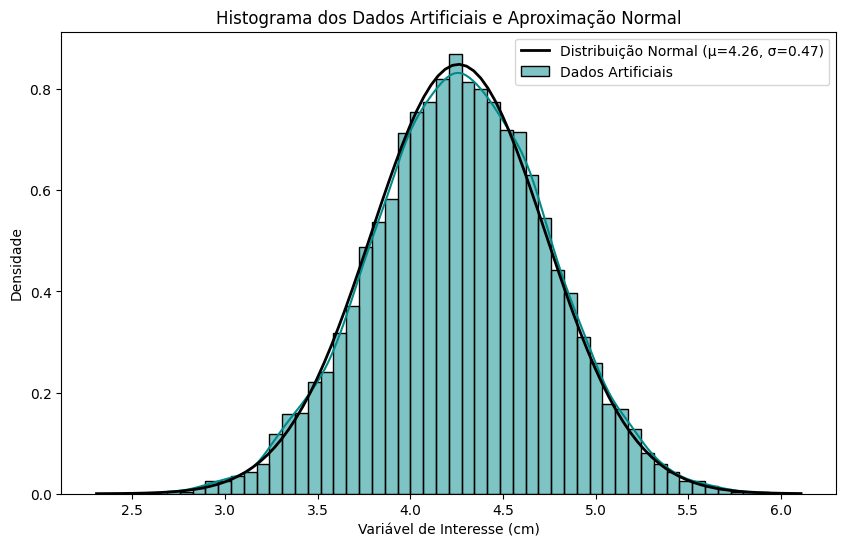

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(dados_artificiais, bins=50, kde=True, stat="density", color="darkcyan", label="Dados Artificiais")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, MU, SIGMA)
plt.plot(x, p, 'k', linewidth=2, label=f"Distribuição Normal (μ={MU:.2f}, σ={SIGMA:.2f})")

plt.title('Histograma dos Dados Artificiais e Aproximação Normal')
plt.xlabel('Variável de Interesse (cm)')
plt.ylabel('Densidade')
plt.legend()
plt.show()

### Estudo de Probabilidade e Padronização (Z-score)

Definimos um evento de interesse para a nossa variável (Comprimento da Pétala) e calculamos a probabilidade de sua ocorrência.

* Evento de Interesse: Qual é a probabilidade de uma pétala ter um comprimento maior que $X_{corte}$ cm? (Ex: $P(X > 5.0)$).

A probabilidade é a área sob a Curva Normal à direita do valor de corte. Para calcular essa área, utilizamos dois métodos equivalentes:

####Cálculo A: Versão Não Padronizada

Usamos a função norm.cdf() com os parâmetros originais de $\mu$ e $\sigma$ para encontrar a probabilidade direta

In [51]:
VALOR_DE_CORTE = 5.0

prob_menor_ou_igual = norm.cdf(VALOR_DE_CORTE, loc=MU, scale=SIGMA)
prob_maior_que = 1 - prob_menor_ou_igual

print(f"Probabilidade P(X > {VALOR_DE_CORTE} cm) na versão Não Padronizada: {prob_maior_que:.4f}")

Probabilidade P(X > 5.0 cm) na versão Não Padronizada: 0.0577


####Cálculo B: Versão Padronizada

O valor de corte $X$ é transformado em $Z$:$$Z = \frac{X - \mu}{\sigma}$$

In [52]:
Z_score = (VALOR_DE_CORTE - MU) / SIGMA

print(f"O valor X = {VALOR_DE_CORTE} cm corresponde ao Z-score: {Z_score:.2f}")

O valor X = 5.0 cm corresponde ao Z-score: 1.57
Probabilidade P(Z > 1.57) na versão Padronizada (Z-score): 0.0577


A função norm.cdf() é usada com os parâmetros da Normal Padrão ($\mu=0, \sigma=1$) para obter a probabilidade de forma precisa e programática.

In [53]:
prob_menor_z = norm.cdf(Z_score, loc=0, scale=1)
prob_maior_z = 1 - prob_menor_z

print(f"Probabilidade P(Z > {Z_score:.2f}) na versão Padronizada (Z-score): {prob_maior_z:.4f}")

Probabilidade P(Z > 1.57) na versão Padronizada (Z-score): 0.0577


####Visualização da probabilidade

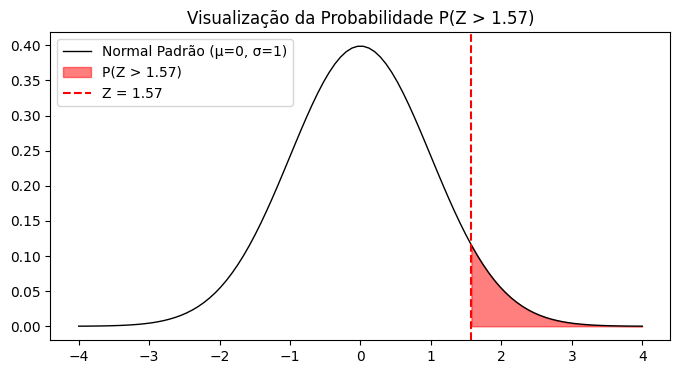

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
x_norm = np.linspace(-4, 4, 100)
ax.plot(x_norm, norm.pdf(x_norm, 0, 1), 'k-', lw=1, label='Normal Padrão (μ=0, σ=1)')

x_fill = np.linspace(Z_score, 4, 100)
ax.fill_between(x_fill, norm.pdf(x_fill, 0, 1), color='red', alpha=0.5, label=f'P(Z > {Z_score:.2f})')

ax.set_title('Visualização da Probabilidade P(Z > 1.57)')
ax.axvline(Z_score, color='red', linestyle='--', label=f'Z = {Z_score:.2f}')
ax.legend()
plt.show()

###Comparação entre função e tabela

Para comparar o resultado de probabilidade da funcão python (norm.cdf) com o resultado da tabela Z, irei primeiro arredondar o Z-score para 2 casas decimais (valor esperado na tabela)

In [54]:
Z_score_arredondado = round(Z_score, 2)

prob_menor_z = norm.cdf(Z_score_arredondado, loc=0, scale=1)
prob_maior_z = 1 - prob_menor_z

print(f"Probabilidade P(Z < {Z_score:.2f}) na versão Padronizada (Z-score): {prob_menor_z:.4f}")

Probabilidade P(Z < 1.57) na versão Padronizada (Z-score): 0.9418


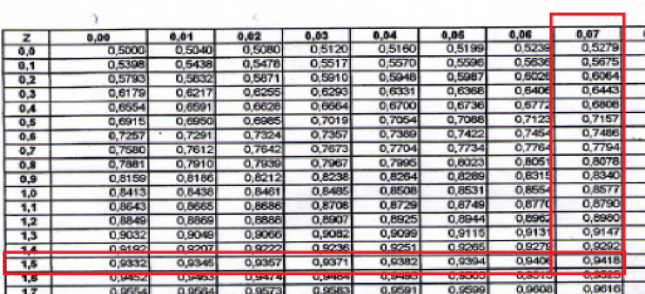

A equivalência dos resultados obtidos nos dois métodos comprova o poder de simplificação da padronização via Z-score, permitindo que qualquer problema de probabilidade Normal seja resolvido com uma única tabela.

##Seção C - Para s = 0.80, reproduza a mesma simulação do slide anterior. Faça o cálculo explicitamente, usando a equação. Compare os resultados. Mostre o histograma também para as 10 primeiras amostras, conforme exemplo dos próximos slides.

### Contexto


Esta seção replica o cenário de probabilidade Binomial apresentado no slide 13, substituindo a probabilidade de sucesso ($s$) de $0.95$ para o novo valor: $s=0.80$.

Assumimos os seguintes parâmetros para o cálculo da probabilidade de obter 48 sucessos ($x$) em 50 tentativas ($n$):
* Tentativas ($n$): 50
* Sucessos de Interesse ($x$): 48
* Prob. de Sucesso ($p=s$): $0.80$
* Prob. de Falha ($q=1-p$): $0.20$

###Calculo explicito da probabilidade

Primeiro a formula da equação:
$$P_{x}=\binom{n}{x}p^{x}q^{n-x}$$

preenchida:

$$P_{x}=\binom{50}{48}\times (0.80)^{48} \times (0.20)^{50-48}$$

resolução:

$$P_{48} = 1225 \times (0.80)^{48} \times (0.20)^{2}$$

$$P_{48} = 0,001092$$

In [56]:
n = 50
x = 48

p_80 = 0.80
prob_80 = binom.pmf(x, n, p_80)

print(f"Cenário (s=0.80):   Probabilidade  = {prob_80:.6f}")

Cenário (s=0.80):   Probabilidade  = 0.001093


Vemos então que o resultado do cálculo é o mesmo do retornado pela função para s=0.8

####Comparação de Resultados

O resultado de $\mathbf{0.109\%}$ (para $s=0.80$) é comparado com o $\mathbf{26.1\%}$ do slide (para $s=0.95$). A diferença demonstra o quão menos provável é obter um resultado tão alto ($48$ sucessos) quando a chance de falha aumenta, movendo o evento para a cauda da distribuição.

###Histograma das Primeiras Amostras (n=10, s=0.80)

Para ilustrar a variabilidade da amostragem, simulamos 10 rodadas de um experimento Binomial, onde cada rodada teve $n=10$ tentativas e probabilidade de sucesso $p=0.80$.

O histograma abaixo mostra a frequência do número de sucessos (entre 0 e 10) obtidos nessas 10 simulações, conforme o exemplo dos slides.


Resultados das 10 Amostras (n=10, s=0.95): [10 10 10 10  8 10 10 10  9 10]


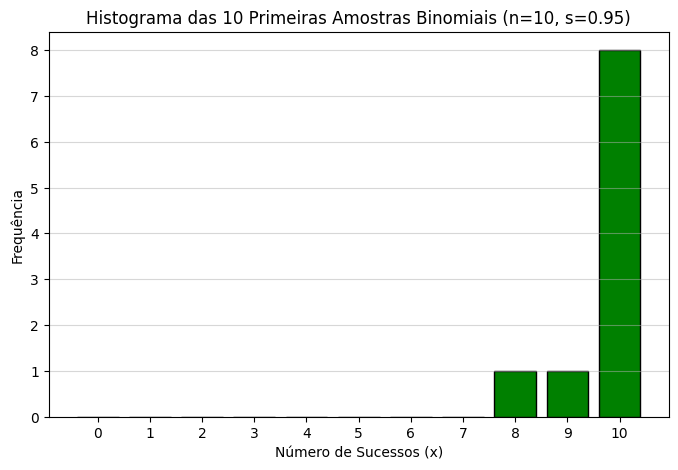

In [57]:
n_amostra = 10
p_sim = 0.95
n_simulacoes = 10

resultados_simulacao = binom.rvs(n=n_amostra, p=p_sim, size=n_simulacoes)

print(f"\nResultados das 10 Amostras (n={n_amostra}, s={p_sim}): {resultados_simulacao}")

plt.figure(figsize=(8, 5))
plt.hist(resultados_simulacao, bins=np.arange(n_amostra + 2) - 0.5,
         rwidth=0.8, color='green', edgecolor='black')

plt.xticks(np.arange(n_amostra + 1))
plt.title(f'Histograma das 10 Primeiras Amostras Binomiais (n=10, s={p_sim})')
plt.xlabel('Número de Sucessos (x)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.5)
plt.show()